In [1]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd


import hashlib
import json
from os import listdir
from os.path import isfile, join
import pandas as pd

%matplotlib inline

In [2]:
os.getcwd()

'/scratch/connectome/jubin/ABCD-3DCNN/STEP_5_Transfer_learning/codes'

In [3]:
global dataset, exp, dir_path

dataset='ABCD'
# exp='age_scratch_13cc31.json'
model='DenseNet3D121'
dir_path = f'/scratch/connectome/jubin/result'

In [14]:
!ls $dir_path/*siteSC_1?_*

/scratch/connectome/jubin/result/ABCD_MAE_siteSC_10_3b63c4.json
/scratch/connectome/jubin/result/ABCD_MAE_siteSC_11_248f5e.json
/scratch/connectome/jubin/result/ABCD_MAE_siteSC_12_9dfdc7.json
/scratch/connectome/jubin/result/ABCD_MAE_siteSC_13_765f6f.json
/scratch/connectome/jubin/result/ABCD_MAE_siteSC_14_264827.json
/scratch/connectome/jubin/result/ABCD_MAE_siteSC_15_dd6b04.json
/scratch/connectome/jubin/result/ABCD_MAE_siteSC_16_648b2d.json
/scratch/connectome/jubin/result/ABCD_MAE_siteSC_17_790363.json
/scratch/connectome/jubin/result/ABCD_MAE_siteSC_18_e4c9f0.json
/scratch/connectome/jubin/result/ABCD_MAE_siteSC_19_50eeeb.json


In [18]:
SC1 = !ls $dir_path/*siteSC_1?_*
SC1[3:-1]

['/scratch/connectome/jubin/result/ABCD_MAE_siteSC_13_765f6f.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_14_264827.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_15_dd6b04.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_16_648b2d.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_17_790363.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_18_e4c9f0.json']

In [28]:
SC2 = !ls $dir_path/*siteSC_2?_*
SC2[:9]

['/scratch/connectome/jubin/result/ABCD_MAE_siteSC_20_82d5c1.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_21_eb5d00.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_22_b49b7d.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_23_728556.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_24_c675f8.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_25_c899ae.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_26_178717.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_27_c28f6b.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_28_33021a.json']

In [33]:
SC3 = !ls $dir_path/*siteSC_3?_*
SC3[:5]

['/scratch/connectome/jubin/result/ABCD_MAE_siteSC_30_453b55.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_31_cadb9a.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_32_6dae95.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_33_402775.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_34_8e8260.json']

In [34]:
jsons = SC1[3:-2] + SC1[-1:] + SC2[:9] + SC1[8:9] + SC2[9:] + SC3[:5]
jsons

['/scratch/connectome/jubin/result/ABCD_MAE_siteSC_13_765f6f.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_14_264827.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_15_dd6b04.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_16_648b2d.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_17_790363.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_19_50eeeb.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_20_82d5c1.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_21_eb5d00.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_22_b49b7d.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_23_728556.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_24_c675f8.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_25_c899ae.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_26_178717.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_27_c28f6b.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_site

In [35]:
import os.path
from datetime import datetime

for file in jsons:
    print(file)
    print(datetime.fromtimestamp(os.path.getctime(file)).strftime('%Y.%m.%d %H:%M:%S'))
#     print("Last modified: %s" % time.ctime(os.path.getmtime(dir_path+'/'+file)))
#     print("Created: %s" % time.ctime(os.path.getctime(dir_path+'/'+file)))
    print()

/scratch/connectome/jubin/result/ABCD_MAE_siteSC_13_765f6f.json
2022.08.24 10:17:50

/scratch/connectome/jubin/result/ABCD_MAE_siteSC_14_264827.json
2022.08.24 12:16:11

/scratch/connectome/jubin/result/ABCD_MAE_siteSC_15_dd6b04.json
2022.08.24 14:32:08

/scratch/connectome/jubin/result/ABCD_MAE_siteSC_16_648b2d.json
2022.08.24 17:07:21

/scratch/connectome/jubin/result/ABCD_MAE_siteSC_17_790363.json
2022.08.24 18:40:19

/scratch/connectome/jubin/result/ABCD_MAE_siteSC_19_50eeeb.json
2022.08.25 02:43:05

/scratch/connectome/jubin/result/ABCD_MAE_siteSC_20_82d5c1.json
2022.08.25 04:31:42

/scratch/connectome/jubin/result/ABCD_MAE_siteSC_21_eb5d00.json
2022.08.25 05:54:41

/scratch/connectome/jubin/result/ABCD_MAE_siteSC_22_b49b7d.json
2022.08.25 07:46:05

/scratch/connectome/jubin/result/ABCD_MAE_siteSC_23_728556.json
2022.08.25 10:11:29

/scratch/connectome/jubin/result/ABCD_MAE_siteSC_24_c675f8.json
2022.08.25 11:54:01

/scratch/connectome/jubin/result/ABCD_MAE_siteSC_25_c899ae.json
2

In [36]:
## ===== loading json file as pandas data frame ===== ##
def load_exp_result(filename):
    list_result = []
    with open(filename, 'r') as infile:
        results = json.load(infile)
        list_result.append(results)
    df = pd.DataFrame(list_result) # .drop(columns=[])
    return df


## ===== plotting loss and accuracy graph together ===== ## 
def plot_loss_acc(df,**kwargs):
    train_losses = df['train_losses']
    train_losses = list(train_losses[0].values())[0]

    val_losses = df['val_losses']
    val_losses = list(val_losses[0].values())[0]
    
    train_accs = df['train_accs']
    train_accs = list(train_accs[0].values())[0]
    
    val_accs = df['val_accs']
    val_accs = list(val_accs[0].values())[0]
    
    ## === making dataframe for loss === ##
    loss_data = []
    
    for epoch,train_loss in enumerate(train_losses,0):
        loss_data.append({'type':'train','loss':train_loss,'epoch':epoch})

    
    for epoch,val_loss in enumerate(val_losses,0):
        loss_data.append({'type':'val','loss':val_loss,'epoch':epoch})
    
    df_loss = pd.DataFrame(loss_data)
    ## ================================== ##
    
    ## === making dataframe for acc === ##
    acc_data = []
    
    for epoch,train_acc in enumerate(train_accs,0):
        acc_data.append({'type':'train','acc':train_acc,'epoch':epoch})
    
    for epoch,val_acc in enumerate(val_accs,0):
        acc_data.append({'type':'val','acc':val_acc,'epoch':epoch})
        
    df_acc = pd.DataFrame(acc_data)
    ## ================================== ##
    
    ## === plotting == ##
    plt.rcParams["figure.figsize"] = (10,6)
    fig, axes = plt.subplots(1,2)
    plt.subplots_adjust(wspace=0.5)

    sns.lineplot(x=df_loss['epoch'], y=df_loss['loss'],hue=df_loss['type'],ax=axes[0])
    sns.lineplot(x=df_acc['epoch'], y=df_acc['acc'],hue=df_acc['type'],ax=axes[1])
    
    model = df['model'][0]
    acc_val = df['val_accs'][0]['age'][-1]
    try:
        acc_test = df['test_acc'][0]['age'][-1]
    except:
        pass
    optim = df['optim'][0]
    
    try:
        title_string = f"Exp name : {df.exp_name[0]}\n\
        ABCD site: {df['filter'][0]} \n \
        scheduler: {df['scheduler'][0]} \n\
        Model structure is {model} \n\
        Acc(val/test) is {acc_val:.2f}/{acc_test:.2f} \n\
        Optimizer is {optim}"
    except:
        title_string = f"Exp name : {df.exp_name[0]}\n\
        ABCD site: {df['filter'][0]} \n \
        scheduler: None \n\
        Model structure is {model} \n\
        Acc(val) is {acc_val:.2f} \n\
        Optimizer is {optim}"
        print("NO TEST RESULT",df.exp_name[0])
    plt.suptitle(title_string,y=1.2)

In [49]:
df.columns

Index(['train_losses', 'train_accs', 'val_losses', 'val_accs', 'model',
       'dataset', 'data', 'val_size', 'test_size', 'resize',
       'train_batch_size', 'val_batch_size', 'in_channels', 'optim',
       'scheduler', 'early_stopping', 'lr', 'lr_adjust', 'weight_decay',
       'epoch_FC', 'exp_name', 'cat_target', 'num_target', 'confusion_matrix',
       'gpus', 'sbatch', 'transfer', 'unfrozen_layer', 'load', 'init_unfrozen',
       'scratch', 'filter'],
      dtype='object')

/home/connectome/jubin/.conda/envs/3DCNN/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


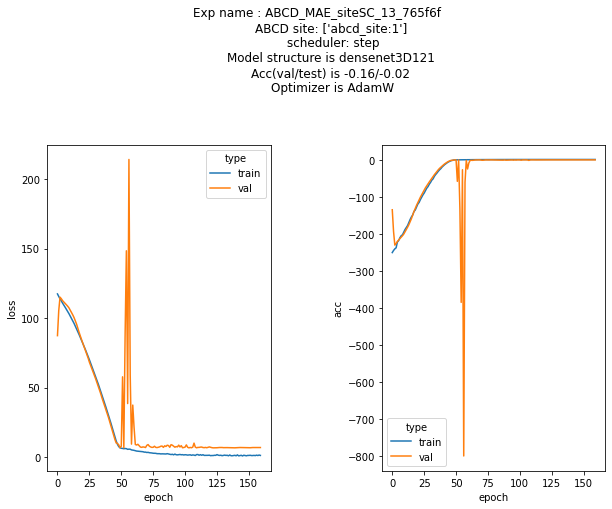

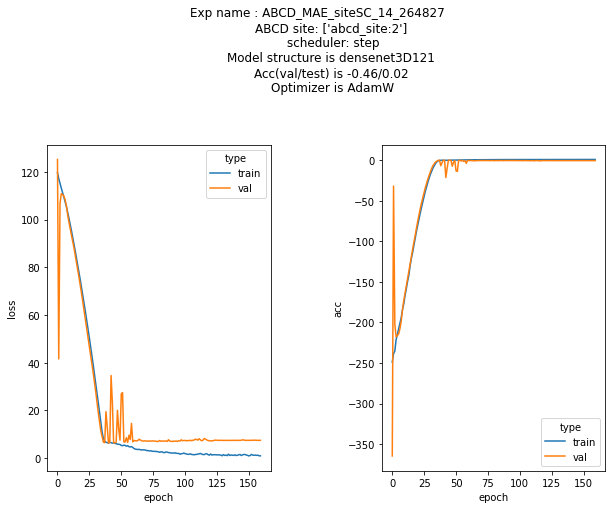

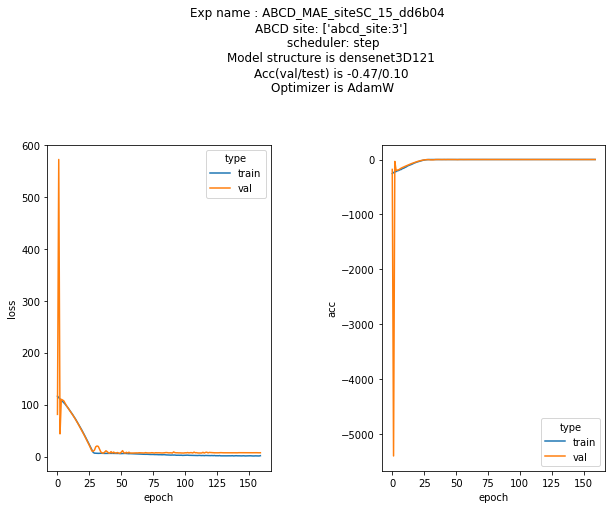

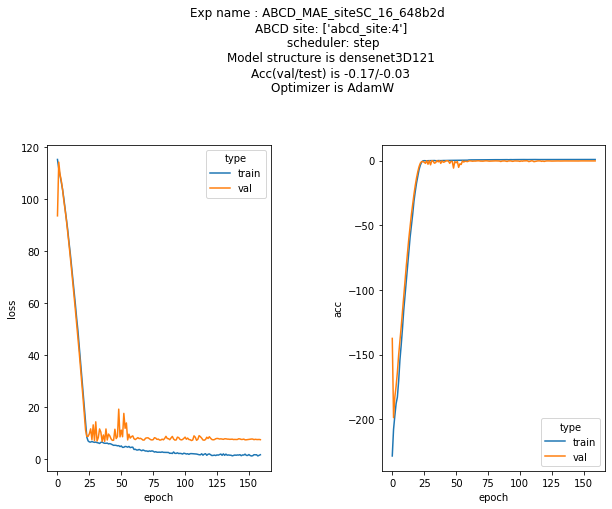

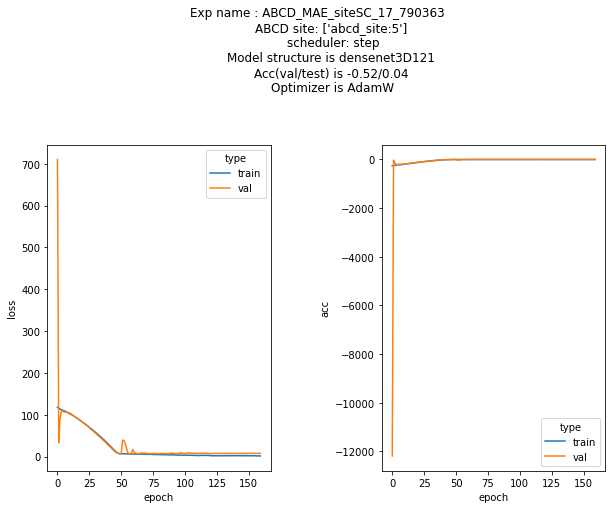

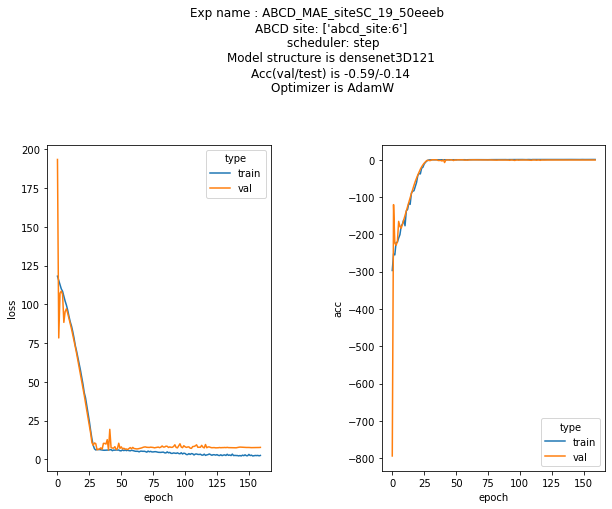

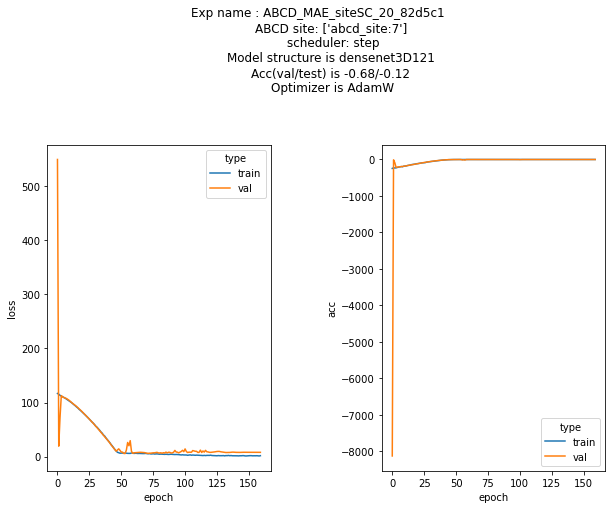

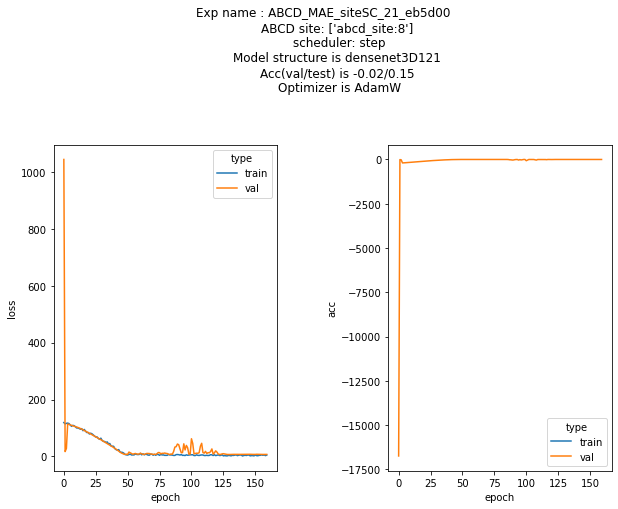

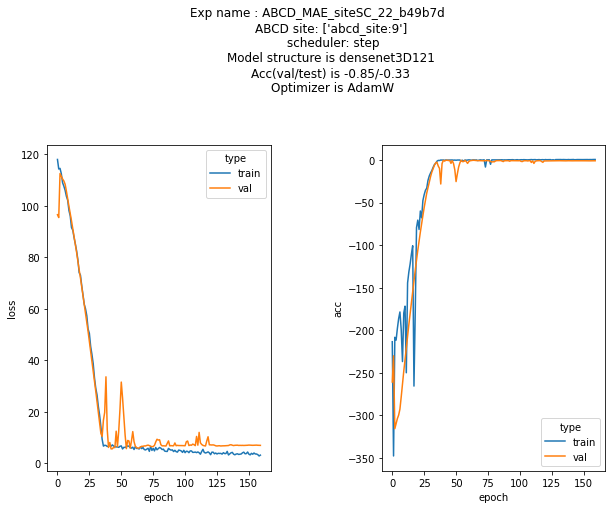

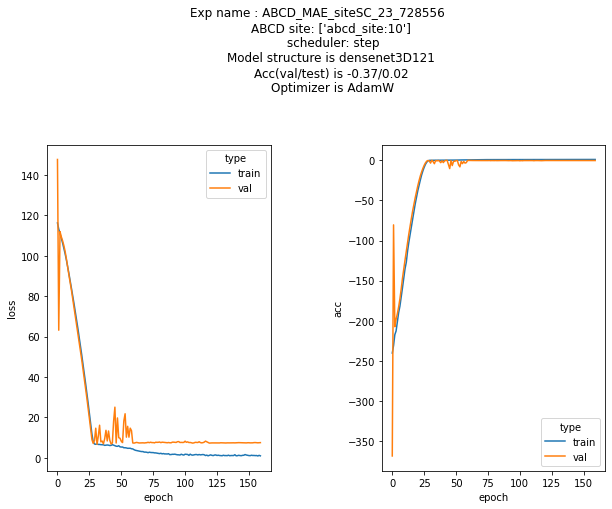

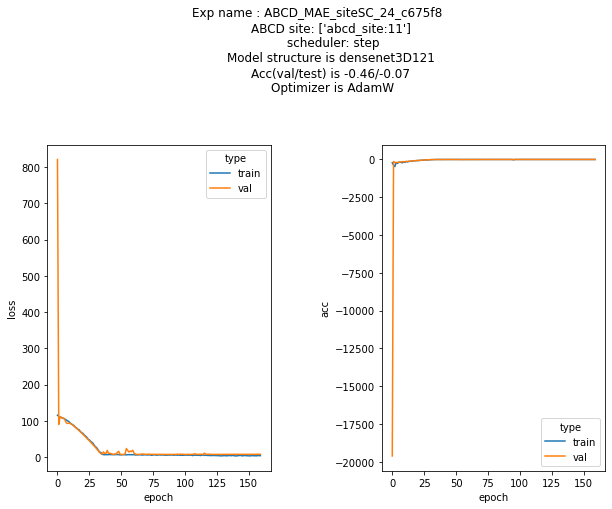

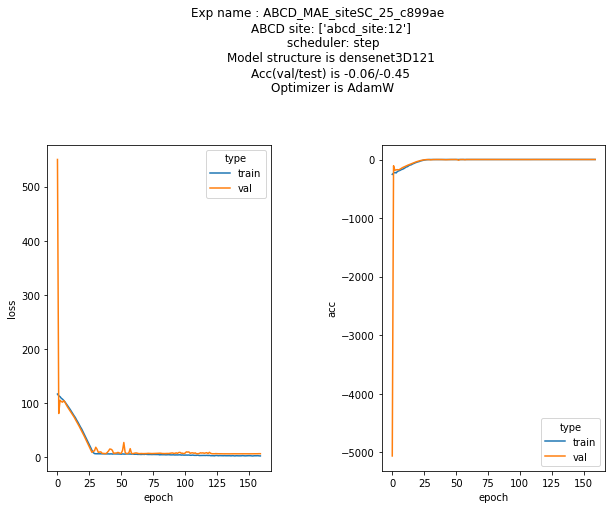

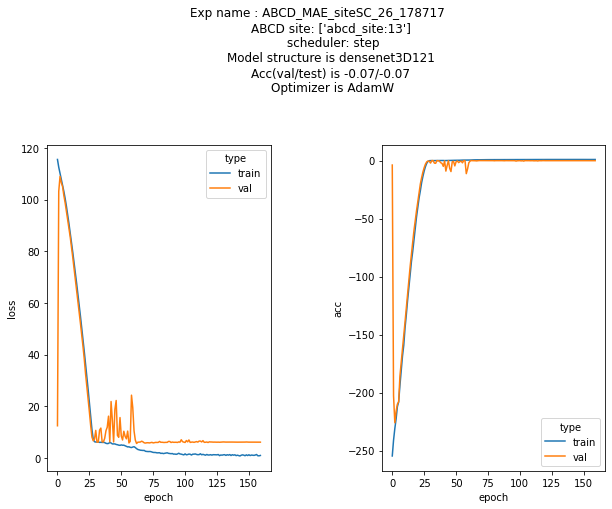

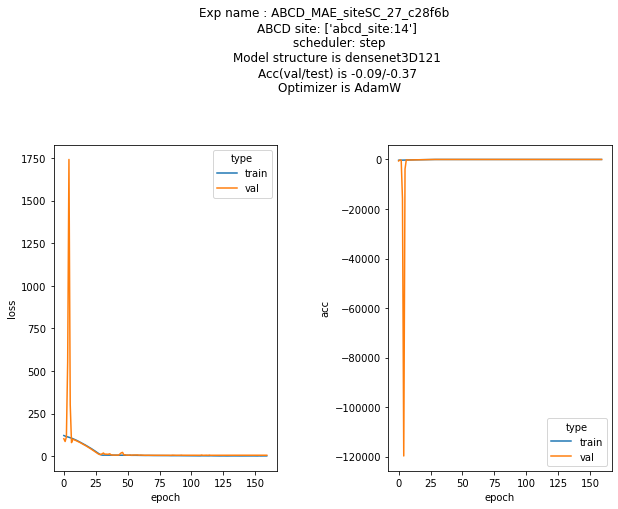

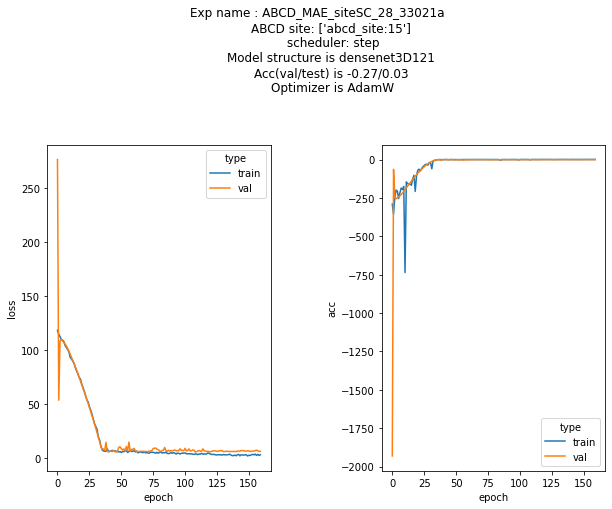

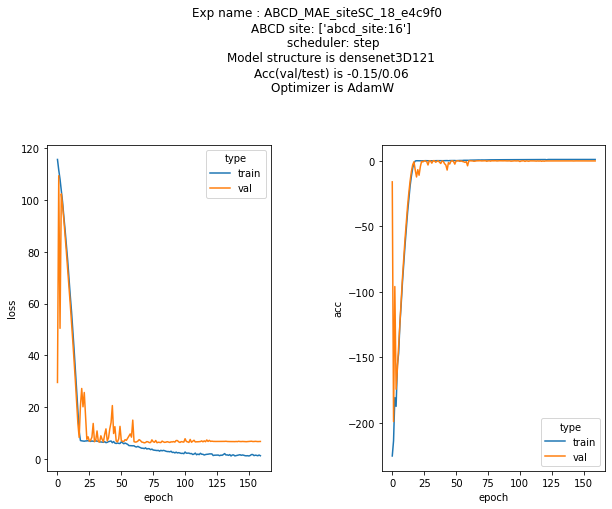

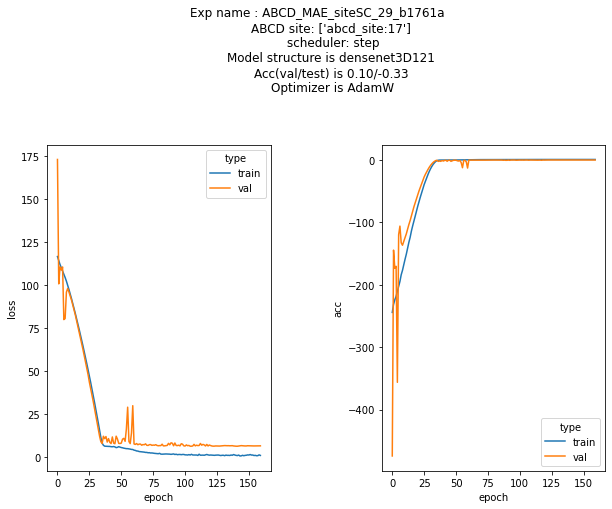

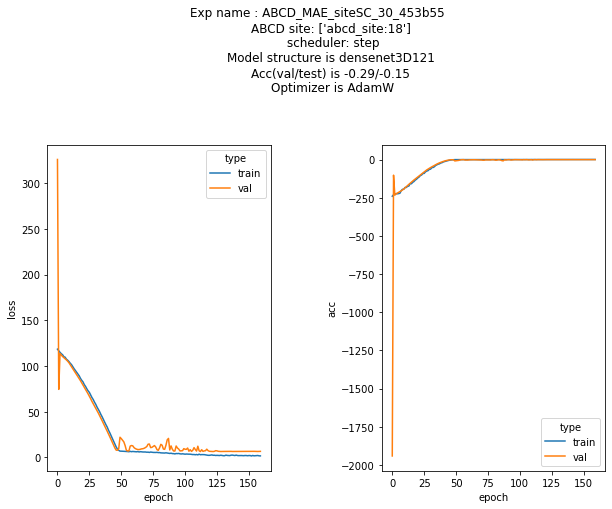

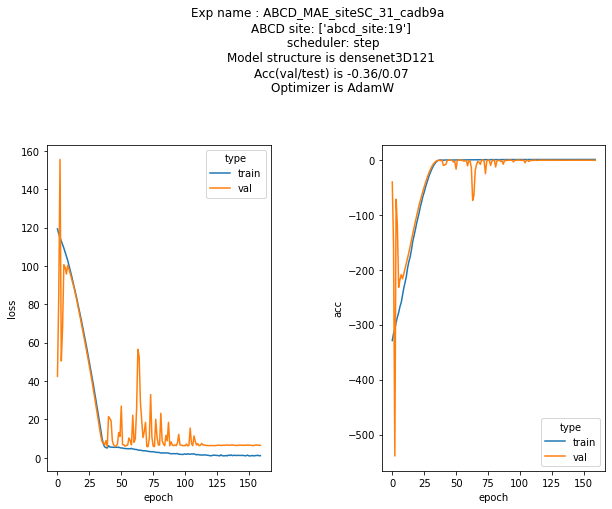

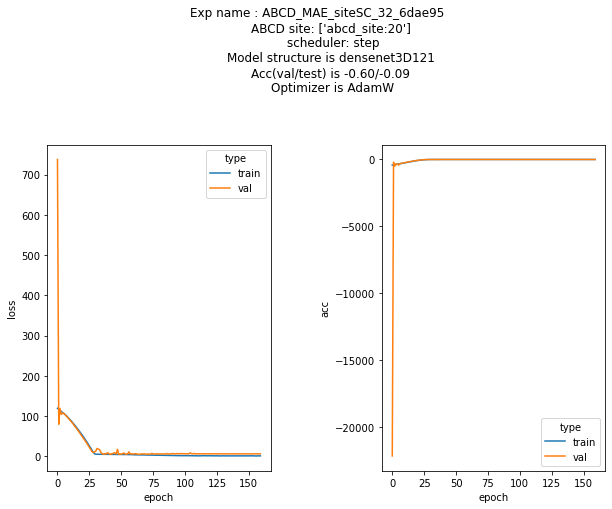

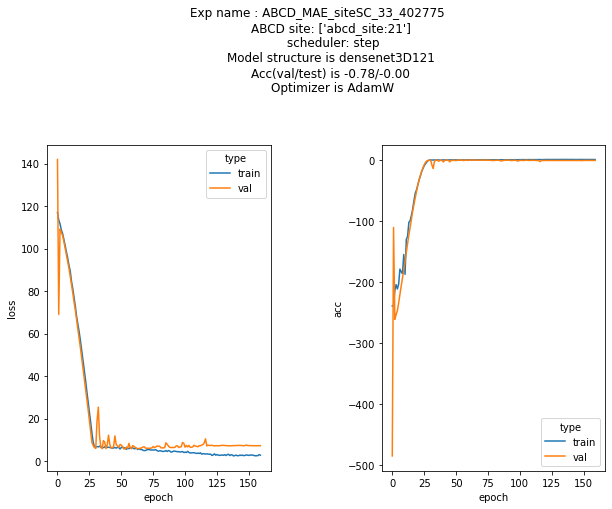

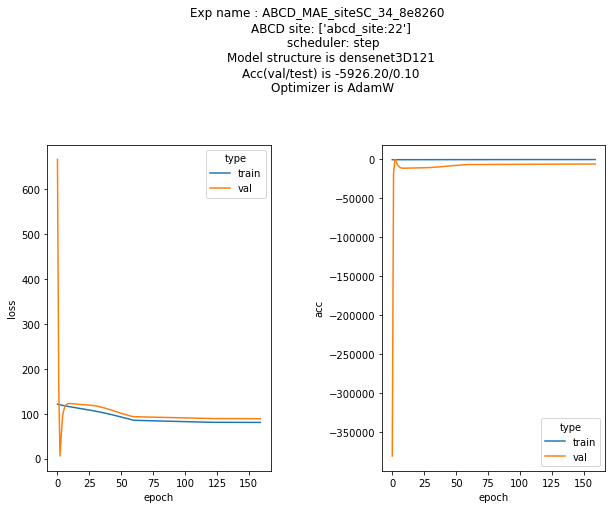

In [37]:
# file_list = glob.glob(f'{dir_path}/{exp}')
# print(file_list)
file_list = jsons
for file in file_list:
#     file_path = dir_path+'/'+file
#     df = load_exp_result(file_path)
    df = load_exp_result(file)
    dl = plot_loss_acc(df)

In [51]:
TL_jsons1 = !ls $dir_path/*siteSC_89_*

In [52]:
TL_jsons2 = !ls $dir_path/*siteSC_9?_*

In [53]:
TL_jsons = TL_jsons1+TL_jsons2
TL_jsons

['/scratch/connectome/jubin/result/ABCD_MAE_siteSC_89_6516bb.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_90_64049a.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_91_8b2acf.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_92_6ce62a.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_93_df642d.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_94_96a985.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_95_1ba6d8.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_96_90c63d.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_97_682456.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_98_7a1d9e.json',
 '/scratch/connectome/jubin/result/ABCD_MAE_siteSC_99_f553f3.json']

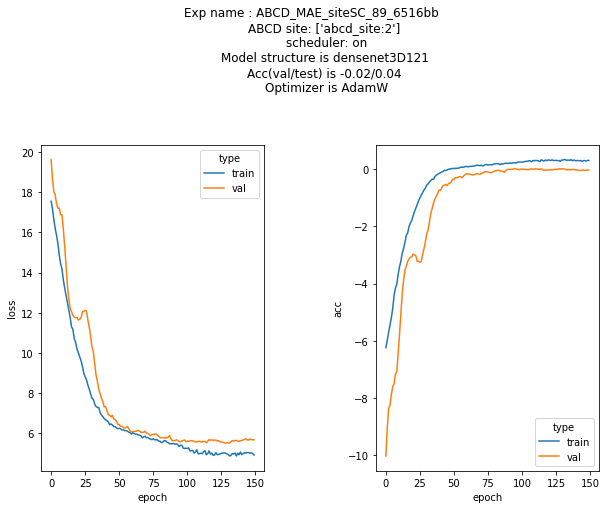

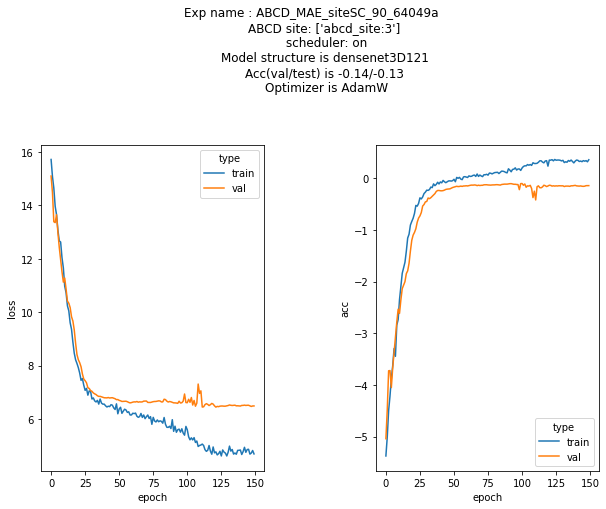

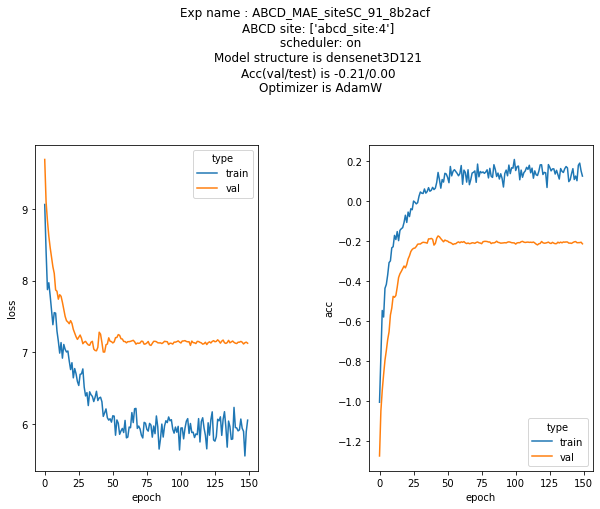

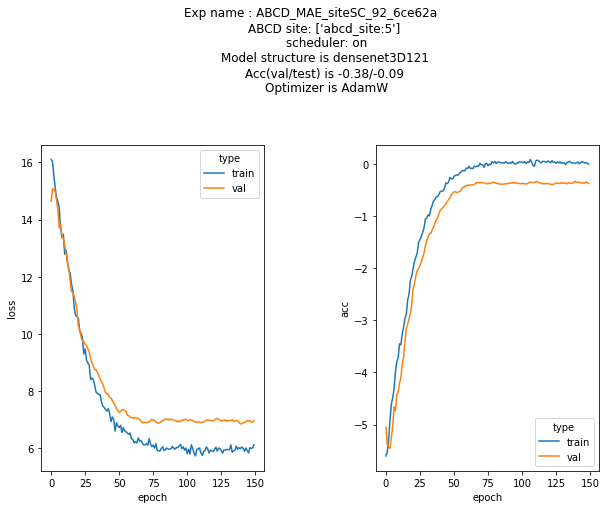

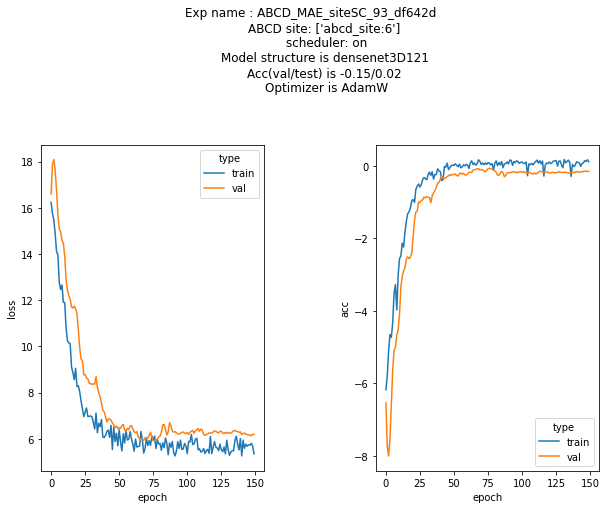

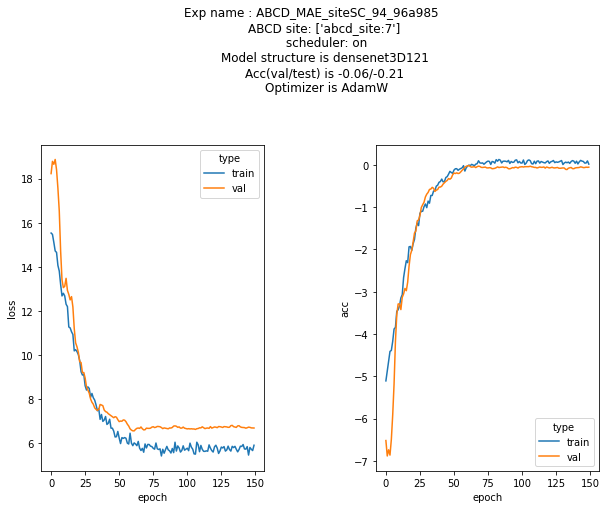

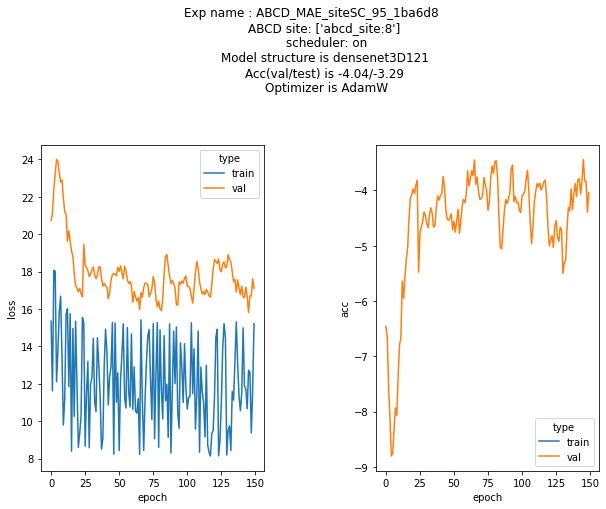

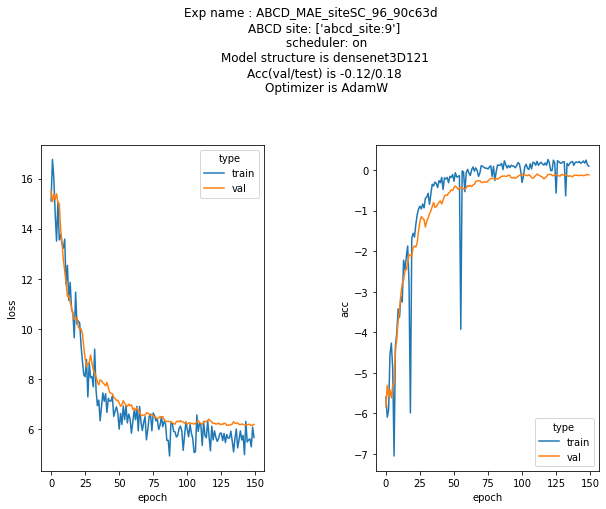

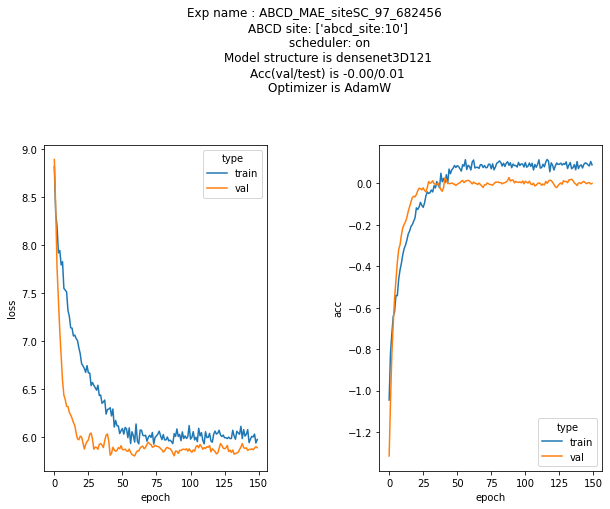

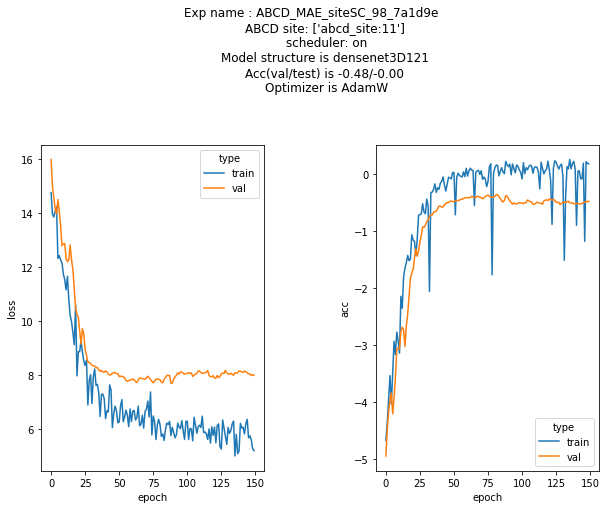

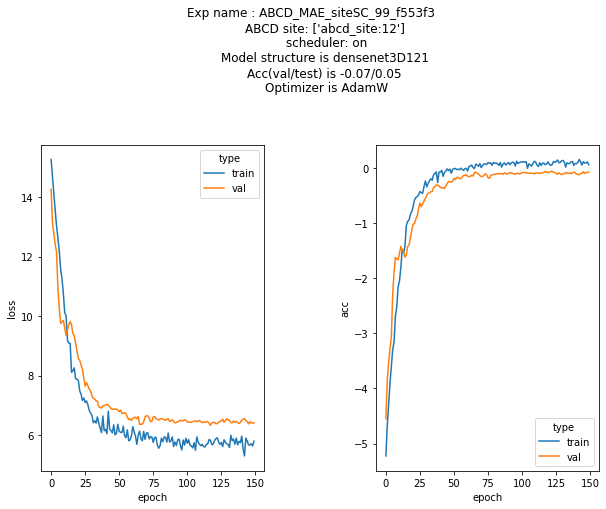

In [54]:
file_list = TL_jsons
for file in file_list:
    df = load_exp_result(file)
    dl = plot_loss_acc(df)